In [1]:
import datajoint as dj
from pathlib import Path

dj.config.load(
    Path("../dj_local_conf.json").absolute()
)  # load config for database connection info

from spyglass.mua.v1.mua import MuaEventsV1, MuaEventsParameters

[2024-02-07 14:44:16,324][INFO]: Connecting edeno@lmf-db.cin.ucsf.edu:3306
[2024-02-07 14:44:16,357][INFO]: Connected edeno@lmf-db.cin.ucsf.edu:3306


In [2]:
MuaEventsParameters()

mua_param_name a name for this set of parameters,mua_param_dict dictionary of parameters
default,=BLOB=


In [3]:
MuaEventsV1()

mua_param_name a name for this set of parameters,nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name,pos_merge_id,detection_interval descriptive name of this interval list,analysis_file_name name of the file,mua_times_object_id
default,mediumnwb20230802_.nwb,default_exclusion,test_group,4eb59a18-045a-5768-d12e-b6473415ae1c,pos 0 valid times,mediumnwb20230802_235KSEV39O.nwb,a93532eb-2947-4552-8877-19ea0d2dcc4f


In [4]:
from spyglass.position import PositionOutput

nwb_copy_file_name = "mediumnwb20230802_.nwb"

trodes_s_key = {
    "nwb_file_name": nwb_copy_file_name,
    "interval_list_name": "pos 0 valid times",
    "trodes_pos_params_name": "single_led_upsampled",
}

pos_merge_id = (PositionOutput.TrodesPosV1 & trodes_s_key).fetch1("merge_id")
pos_merge_id

UUID('4eb59a18-045a-5768-d12e-b6473415ae1c')

In [5]:
from spyglass.spikesorting.analysis.v1.group import (
    SortedSpikesGroup,
)

sorted_spikes_group_key = {
    "nwb_file_name": nwb_copy_file_name,
    "sorted_spikes_group_name": "test_group",
    "unit_filter_params_name": "default_exclusion",
}

SortedSpikesGroup & sorted_spikes_group_key

nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name
mediumnwb20230802_.nwb,default_exclusion,test_group


In [6]:
mua_key = {
    "mua_param_name": "default",
    **sorted_spikes_group_key,
    "pos_merge_id": pos_merge_id,
    "detection_interval": "pos 0 valid times",
}

MuaEventsV1().populate(mua_key)
MuaEventsV1 & mua_key

mua_param_name a name for this set of parameters,nwb_file_name name of the NWB file,unit_filter_params_name,sorted_spikes_group_name,pos_merge_id,detection_interval descriptive name of this interval list,analysis_file_name name of the file,mua_times_object_id
default,mediumnwb20230802_.nwb,default_exclusion,test_group,4eb59a18-045a-5768-d12e-b6473415ae1c,pos 0 valid times,mediumnwb20230802_235KSEV39O.nwb,a93532eb-2947-4552-8877-19ea0d2dcc4f


In [7]:
mua_times = (MuaEventsV1 & mua_key).fetch1_dataframe()
mua_times

,start_time,end_time,duration,mean_zscore,median_zscore,max_zscore,min_zscore,speed_at_start,speed_at_end,max_speed,min_speed,median_speed,mean_speed
id,,,,,,,,,,,,,
0,1.625936e+09,1.625936e+09,0.238,1.204139,1.220925,2.258331,0.028349,2.760825,1.517296,3.576624,1.427160,2.851154,2.616020
1,1.625936e+09,1.625936e+09,0.120,1.364368,1.349665,2.412096,0.015503,1.803533,0.497099,1.803533,0.464203,0.553494,0.722099
2,1.625936e+09,1.625936e+09,0.082,1.350428,1.490812,2.229001,0.016666,0.639882,0.830598,0.838116,0.639882,0.791716,0.772154
3,1.625936e+09,1.625936e+09,0.074,1.609420,1.803123,2.578417,0.013637,2.690052,0.684351,2.690052,0.684351,1.327693,1.451886
4,1.625936e+09,1.625936e+09,0.208,1.459232,1.441996,2.610289,0.040791,0.208621,1.136773,1.298535,0.162133,1.088990,0.935486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1.625937e+09,1.625937e+09,0.212,3.099559,3.296528,5.312823,0.013042,1.183369,0.500407,1.183369,0.386452,0.827476,0.791367
161,1.625937e+09,1.625937e+09,0.406,2.234536,2.555549,4.133360,0.013230,0.483370,0.415434,0.967244,0.170981,0.615845,0.603776
162,1.625937e+09,1.625937e+09,0.106,1.272785,1.090846,2.567647,0.029594,1.173970,1.531232,1.586072,1.173970,1.533011,1.472277


[14:44:19][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
/home/edeno/miniconda3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/edeno/miniconda3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/edeno/miniconda3/envs/spyglass/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.2.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/edeno/min

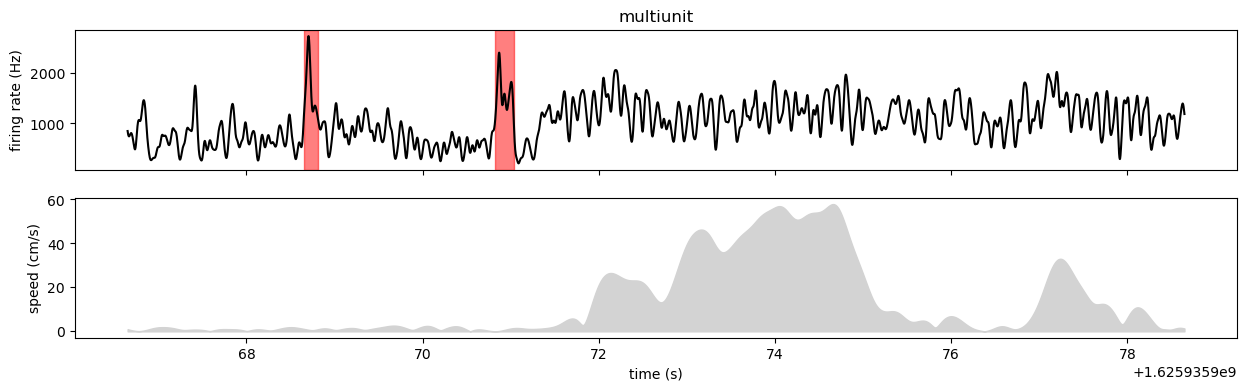

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 4))
speed = MuaEventsV1.get_speed(mua_key).to_numpy()
time = speed.index.to_numpy()
multiunit_firing_rate = MuaEventsV1.get_firing_rate(mua_key, time)

time_slice = slice(
    np.searchsorted(time, mua_times.loc[10].start_time) - 1_000,
    np.searchsorted(time, mua_times.loc[10].start_time) + 5_000,
)

axes[0].plot(
    time[time_slice],
    multiunit_firing_rate[time_slice],
    color="black",
)
axes[0].set_ylabel("firing rate (Hz)")
axes[0].set_title("multiunit")
axes[1].fill_between(time[time_slice], speed[time_slice], color="lightgrey")
axes[1].set_ylabel("speed (cm/s)")
axes[1].set_xlabel("time (s)")

for id, mua_time in mua_times.loc[
    np.logical_and(
        mua_times["start_time"] > time[time_slice].min(),
        mua_times["end_time"] < time[time_slice].max(),
    )
].iterrows():
    axes[0].axvspan(
        mua_time["start_time"], mua_time["end_time"], color="red", alpha=0.5
    )

In [9]:
(MuaEventsV1 & mua_key).create_figurl(
    zscore_mua=True,
)

[14:44:25][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[14:44:29][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False


'https://figurl.org/f?v=gs://figurl/spikesortingview-10&d=sha1://08d7c35434e8469686fca8aff3ec9319bccb44f9&label=Multiunit%20Detection&zone=franklab.default'